In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("E:/Data Mining/ETS Take Home/online_retail.csv")
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 08:26,3.39,17850.0,United Kingdom


## Exploring

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
dataset.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
# Total number of transactions
len(dataset['InvoiceNo'].unique())

25900

In [6]:
#Number of transactions with anonymous customers 
len(dataset[dataset['CustomerID'].isnull()]['InvoiceNo'].unique())

3710

In [7]:
# Frequently sold items by quantitiy
gp_stockcode = dataset.groupby('Description')
gp_stockcode_frq_quantitiy = gp_stockcode['Quantity'].agg(np.sum).sort_values(ascending=False)
gp_stockcode_frq_quantitiy.head(20)

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
JUMBO BAG RED RETROSPOT               47363
ASSORTED COLOUR BIRD ORNAMENT         36381
POPCORN HOLDER                        36334
PACK OF 72 RETROSPOT CAKE CASES       36039
WHITE HANGING HEART T-LIGHT HOLDER    35317
RABBIT NIGHT LIGHT                    30680
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26315
PACK OF 60 PINK PAISLEY CAKE CASES    24753
VICTORIAN GLASS HANGING T-LIGHT       23854
ASSORTED COLOURS SILK FAN             23082
BROCADE RING PURSE                    23053
RED  HARMONICA IN BOX                 21866
JUMBO BAG PINK POLKADOT               21009
SMALL POPCORN HOLDER                  20116
PAPER CHAIN KIT 50'S CHRISTMAS        18902
LUNCH BAG RED RETROSPOT               18779
60 TEATIME FAIRY CAKE CASES           18040
PARTY BUNTING                         18022
Name: Quantity, dtype: int64

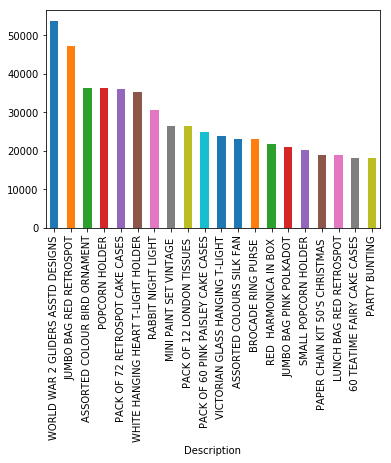

In [8]:
gp_stockcode_frq_quantitiy.head(20).plot.bar()

In [9]:
# Explore By Countries #
gp_country = dataset.groupby('Country')
# Order countries by number of invoices
gp_country['InvoiceNo'].unique().agg(np.size).sort_values(ascending=False)

Country
United Kingdom          23494
Germany                   603
France                    461
EIRE                      360
Belgium                   119
Spain                     105
Netherlands               101
Switzerland                74
Portugal                   71
Australia                  69
Italy                      55
Finland                    48
Sweden                     46
Norway                     40
Channel Islands            33
Japan                      28
Poland                     24
Denmark                    21
Cyprus                     20
Austria                    19
Hong Kong                  15
Unspecified                13
Malta                      10
Singapore                  10
Israel                      9
Iceland                     7
USA                         7
Greece                      6
Canada                      6
European Community          5
Czech Republic              5
Lithuania                   4
Bahrain                     4
Un

In [10]:
# Order countries by number of customers
gp_country['CustomerID'].unique().agg(np.size).sort_values(ascending=False)

Country
United Kingdom          3951
Germany                   95
France                    88
Spain                     31
Belgium                   25
Switzerland               22
Portugal                  20
Italy                     15
Finland                   12
Austria                   11
Norway                    10
Netherlands                9
Australia                  9
Channel Islands            9
Denmark                    9
Cyprus                     8
Sweden                     8
Japan                      8
Poland                     6
Unspecified                5
Israel                     5
Greece                     4
USA                        4
EIRE                       4
Canada                     4
Bahrain                    3
United Arab Emirates       2
Malta                      2
Singapore                  1
Brazil                     1
Iceland                    1
Saudi Arabia               1
Hong Kong                  1
RSA                        1
Europe

In [11]:
# Work on undefined customers
gp_country_null = dataset[dataset['CustomerID'].isnull()].groupby('Country')
#Order countries by number of invoices [For the undefined users]
gp_country_null['InvoiceNo'].unique().agg(np.size).sort_values(ascending=False)

Country
United Kingdom    3637
EIRE                41
Hong Kong           15
Unspecified          5
Switzerland          3
Israel               3
France               3
Bahrain              2
Portugal             1
Name: InvoiceNo, dtype: int64

## Preprocessing

In [12]:
dataset.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [13]:
dataset['Description'] = dataset['Description'].str.strip()
dataset.dropna(axis=0, subset=['Description'], inplace=True)

In [14]:
dataset.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64

In [15]:
# Set transactions
gp_invoiceno = dataset.groupby('InvoiceNo')
transactions = []
for name,group in gp_invoiceno:
    transactions.append(list(group['Description'].map(str)))

In [16]:
# Training Apriori on the dataset
# Needs to import https://pypi.python.org/pypi/apyori/1.0.0
from apyori import apriori
rules = apriori(transactions, min_support = 0.005, min_confidence = 0.2, min_lift = 3, min_length = 2)
# Get the results
results = list(rules)

In [17]:
# Visualising the result as a readeable dataframe
final_results = pd.DataFrame(np.random.randint(low=0, high=1, size=(len(results), 6)), columns=['GeneralRules', 'LeftRules', 'RightRules', 'Support', 'Confidence', 'Lift'])
index = 0
for g, s, i in results:
    final_results.iloc[index] = [' _&&_ '.join(list(g)), ' _&&_ '.join(list(i[0][0])), ' _&&_ '.join(list(i[0][1])), s, i[0][2], i[0][3]]
    index = index+1
# The most significant rules
final_results = final_results.sort_values('Lift', ascending=0)
final_results.head(20)

,GeneralRules,LeftRules,RightRules,Support,Confidence,Lift
5642,HERB MARKER PARSLEY _&&_ HERB MARKER CHIVES _&...,HERB MARKER ROSEMARY _&&_ HERB MARKER PARSLEY ...,HERB MARKER THYME,0.006790,0.988095,101.491497
5682,HERB MARKER PARSLEY _&&_ HERB MARKER CHIVES _&...,HERB MARKER PARSLEY _&&_ HERB MARKER CHIVES _&...,HERB MARKER THYME,0.006463,0.987500,101.430357
5272,HERB MARKER THYME _&&_ HERB MARKER ROSEMARY _&...,HERB MARKER ROSEMARY _&&_ HERB MARKER BASIL _&...,HERB MARKER THYME,0.006913,0.982558,100.922757
5641,HERB MARKER CHIVES _&&_ HERB MARKER MINT _&&_ ...,HERB MARKER MINT _&&_ HERB MARKER ROSEMARY _&&...,HERB MARKER THYME,0.006504,0.981481,100.812169
5280,HERB MARKER THYME _&&_ HERB MARKER ROSEMARY _&...,HERB MARKER ROSEMARY _&&_ HERB MARKER PARSLEY ...,HERB MARKER THYME,0.007322,0.972826,99.923137
5267,HERB MARKER MINT _&&_ HERB MARKER PARSLEY _&&_...,HERB MARKER MINT _&&_ HERB MARKER BASIL _&&_ H...,HERB MARKER PARSLEY,0.006831,0.976608,99.891899
5644,HERB MARKER PARSLEY _&&_ HERB MARKER CHIVES _&...,HERB MARKER ROSEMARY _&&_ HERB MARKER MINT _&&...,HERB MARKER THYME,0.006954,0.971429,99.779592
5643,HERB MARKER PARSLEY _&&_ HERB MARKER MINT _&&_...,HERB MARKER MINT _&&_ HERB MARKER PARSLEY _&&_...,HERB MARKER THYME,0.007077,0.966480,99.271349
5279,HERB MARKER THYME _&&_ HERB MARKER MINT _&&_ H...,HERB MARKER MINT _&&_ HERB MARKER ROSEMARY _&&...,HERB MARKER THYME,0.007036,0.966292,99.252006
5271,HERB MARKER THYME _&&_ HERB MARKER PARSLEY _&&...,HERB MARKER PARSLEY _&&_ HERB MARKER BASIL _&&...,HERB MARKER THYME,0.006954,0.965909,99.212662


In [18]:
count=1
for i, d in final_results.head(10).iterrows():
    print('Rule #'+str(count)+':')
    print(d['LeftRules'])
    print('=> '+d['RightRules'])
    print('Support: '+str(d['Support'])+' - Confidence: '+str(d['Confidence'])+' - Lift: '+str(d['Lift']))
    print('--------------------')
    count=count+1

Rule #1:
HERB MARKER ROSEMARY _&&_ HERB MARKER PARSLEY _&&_ HERB MARKER BASIL _&&_ HERB MARKER CHIVES
=> HERB MARKER THYME
Support: 0.006790476969647386 - Confidence: 0.9880952380952381 - Lift: 101.49149659863946
--------------------
Rule #2:
HERB MARKER PARSLEY _&&_ HERB MARKER CHIVES _&&_ HERB MARKER MINT _&&_ HERB MARKER BASIL _&&_ HERB MARKER ROSEMARY
=> HERB MARKER THYME
Support: 0.006463225067495705 - Confidence: 0.9875 - Lift: 101.43035714285715
--------------------
Rule #3:
HERB MARKER ROSEMARY _&&_ HERB MARKER BASIL _&&_ HERB MARKER CHIVES
=> HERB MARKER THYME
Support: 0.006913196432954267 - Confidence: 0.9825581395348838 - Lift: 100.92275747508307
--------------------
Rule #4:
HERB MARKER MINT _&&_ HERB MARKER ROSEMARY _&&_ HERB MARKER BASIL _&&_ HERB MARKER CHIVES
=> HERB MARKER THYME
Support: 0.006504131555264665 - Confidence: 0.9814814814814814 - Lift: 100.8121693121693
--------------------
Rule #5:
HERB MARKER ROSEMARY _&&_ HERB MARKER PARSLEY _&&_ HERB MARKER CHIVES
=> H

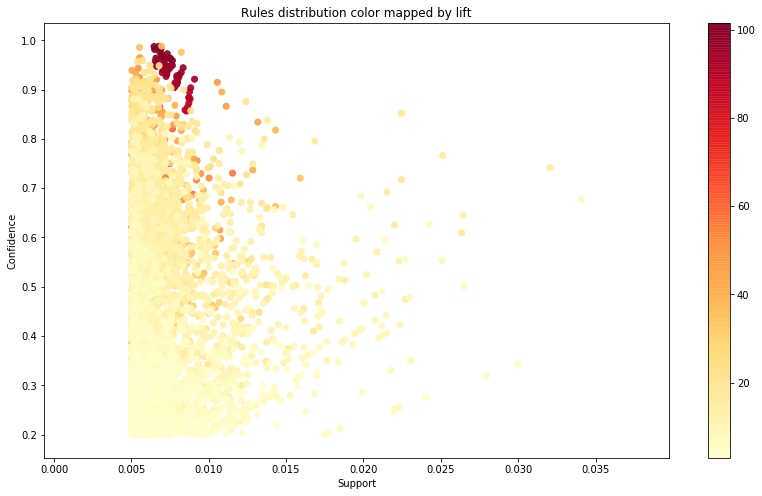

In [20]:
# Visualizing the rules distribution color mapped by Lift
plt.figure(figsize=(14, 8))
plt.scatter(final_results['Support'], final_results['Confidence'], c=final_results['Lift'], alpha=0.9, cmap='YlOrRd');
plt.title('Rules distribution color mapped by lift');
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.colorbar();